Problem Statement : Predicting Passenger Survival on the Titanic Using Artificial Neural Networks (ANN)

Dataset link : Titanic Dataset

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


EDA AND PREPROCESSING,CLEANING

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.describe(include='all') 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.isnull().mean()*100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df.nunique()       

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
df.duplicated().sum()

0

There is not duplicate value in the given dataset.

In [17]:
df['Survived'].value_counts()  

Survived
0    549
1    342
Name: count, dtype: int64

In the given dataset,Survived count is 342 (0) and not  survived count is 549(1).

In [18]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Survival Count by Gender

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Survival by Gender')

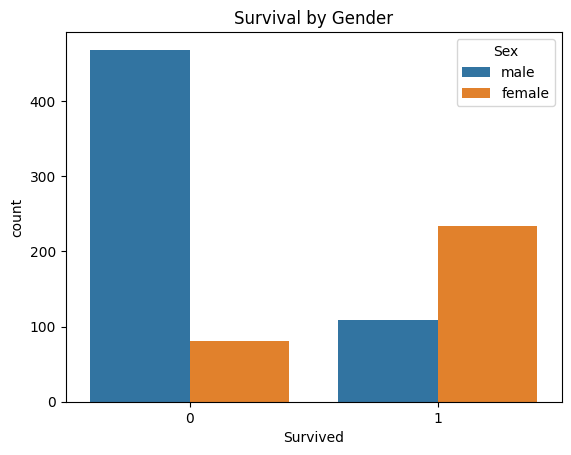

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival by Gender')


Survival Count by Passenger Class

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


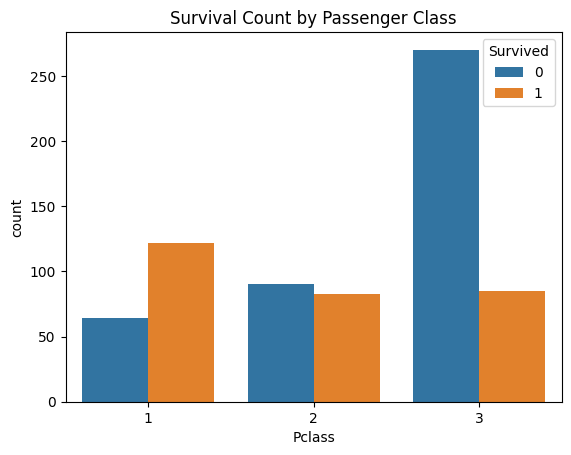

In [31]:
sns.countplot(data=df_clean, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.show()


Age Distribution by Survival

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


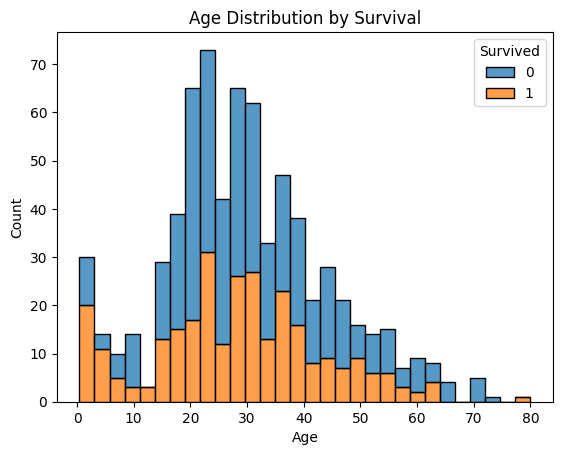

In [32]:
sns.histplot(data=df_clean, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Age Distribution by Survival")
plt.show()


 Fare Distribution by Survival

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


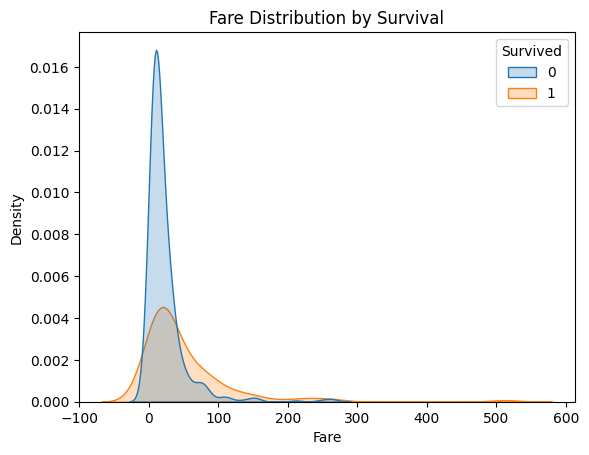

In [33]:
sns.kdeplot(data=df_clean, x='Fare', hue='Survived', fill=True)
plt.title("Fare Distribution by Survival")
plt.show()


Passenger Class vs Fare (Boxplot)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


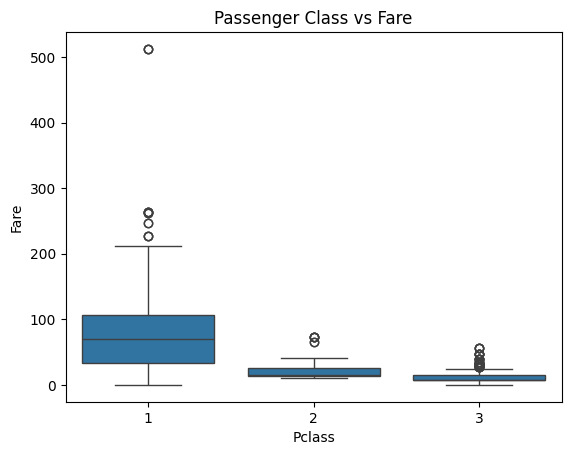

In [34]:
sns.boxplot(data=df_clean, x='Pclass', y='Fare')
plt.title("Passenger Class vs Fare")
plt.show()


<Axes: >

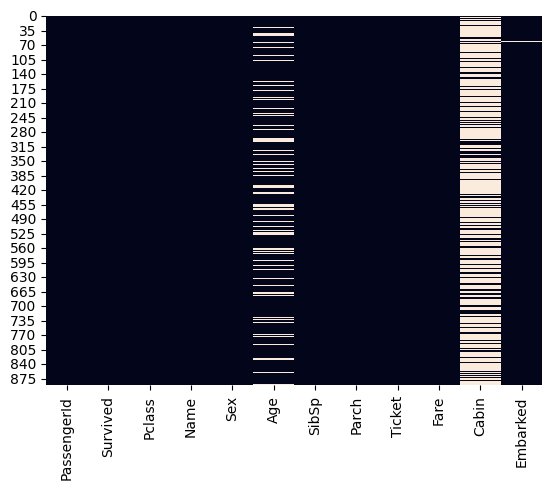

In [20]:
sns.heatmap(df.isnull(), cbar=False)

In [22]:
# Convert 'Fare' and 'Age' to numeric (if needed)
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with essential missing values for visualizations
df = df.dropna(subset=['Fare', 'Age', 'Survived'])


In [24]:
print(df['Cabin'].isnull().sum())

529


Cabin column in the Titanic dataset has a high number of NaNs, which makes it a candidate for dropping unless you plan to extract useful features like the deck letter (e.g., A, B, C...) from it.

In [25]:
df.drop(columns='Cabin', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16684\2098320661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Cabin', inplace=True)


In [26]:
df.shape

(714, 11)

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Almost all null values has been removed from the dataset according to need.

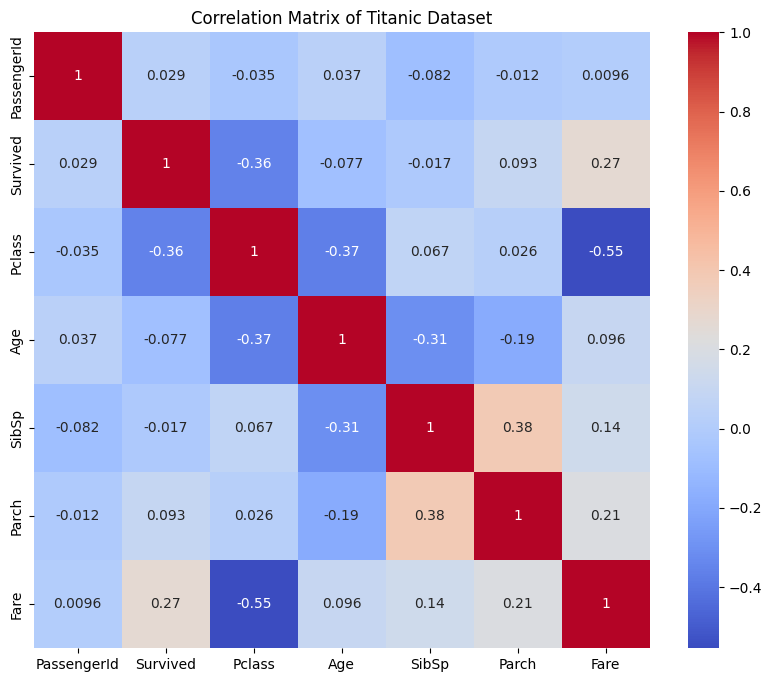

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Titanic Dataset")
plt.show()


Fare and Pclass are the most useful numerical predictors for survival.

Higher fare and higher class = higher survival chance.

Age and family size (SibSp & Parch) offer additional context but are weaker predictors alone.


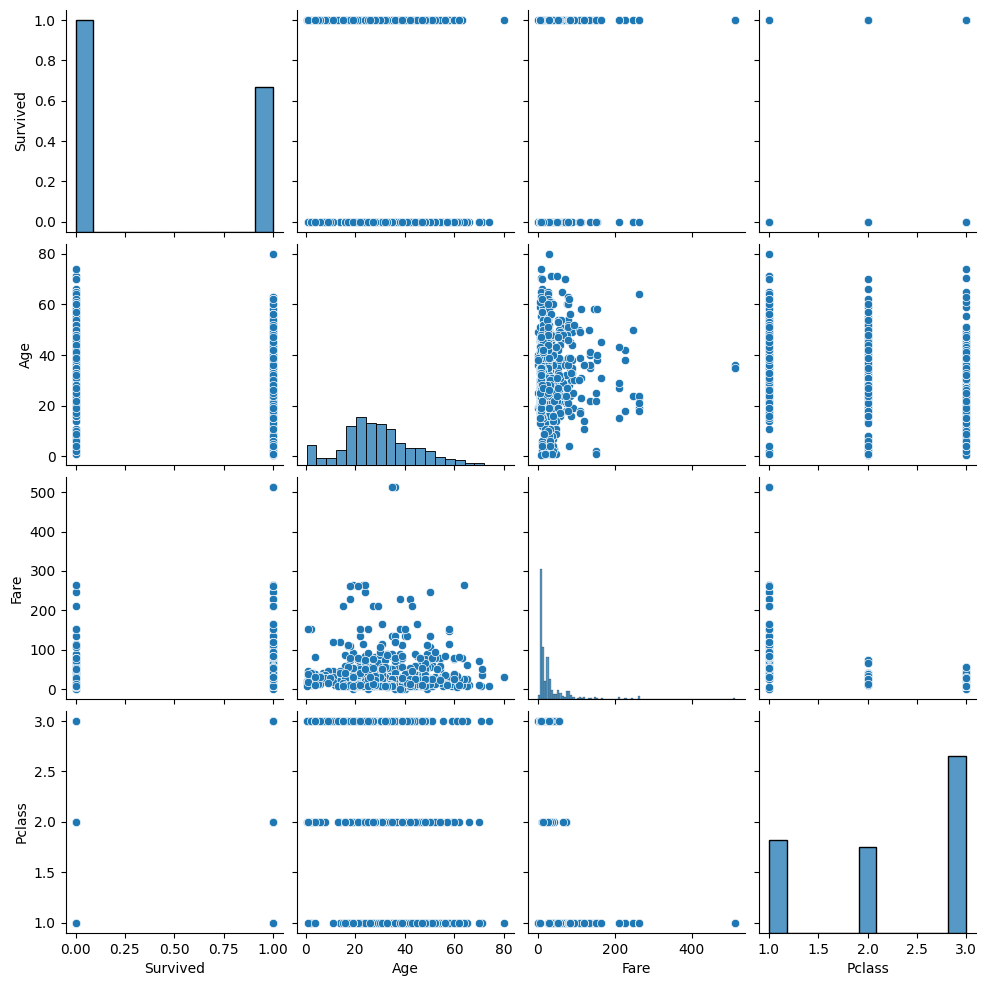

In [35]:
sns.pairplot(df_clean[['Survived', 'Age', 'Fare', 'Pclass']])


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.p

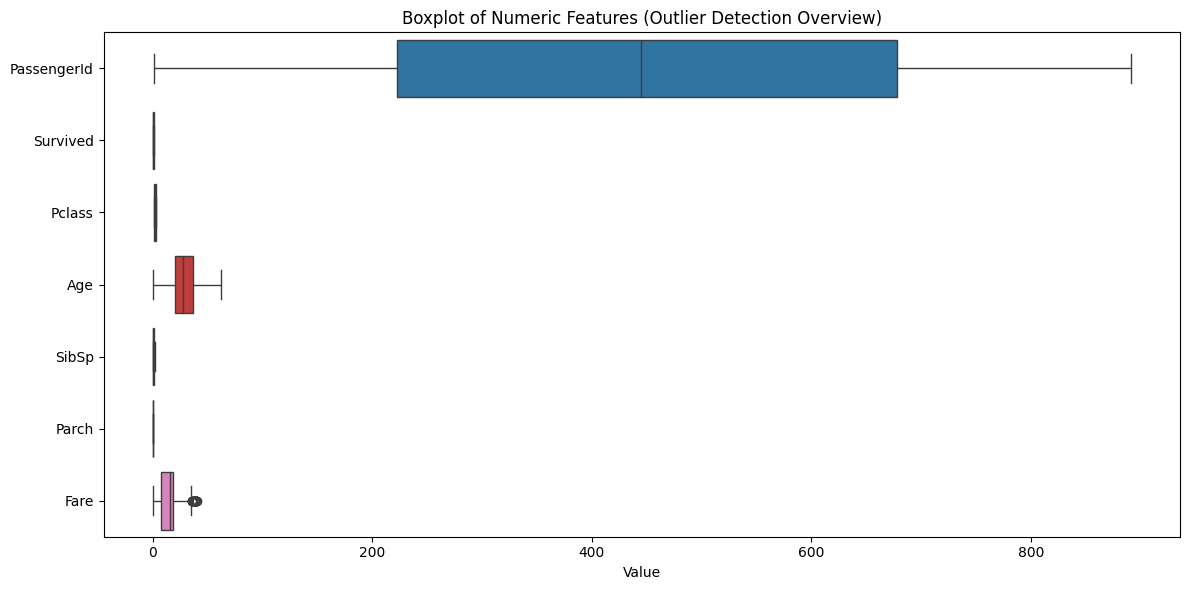

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Boxplot of Numeric Features (Outlier Detection Overview)')
plt.xlabel('Value')
plt.tight_layout()
plt.show()


In [36]:
from scipy.stats import zscore

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute Z-scores
z_scores = zscore(df[numeric_cols])
abs_z_scores = abs(z_scores)

# Set a threshold (commonly 3)
outliers = (abs_z_scores > 3)
outlier_rows = outliers.any(axis=1)

# View rows considered outliers
df_outliers = df[outlier_rows]


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


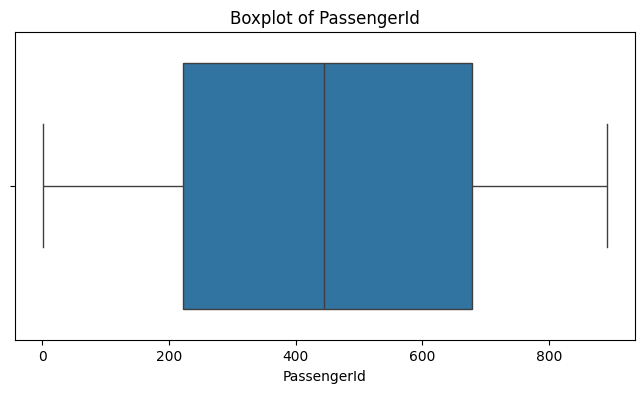

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


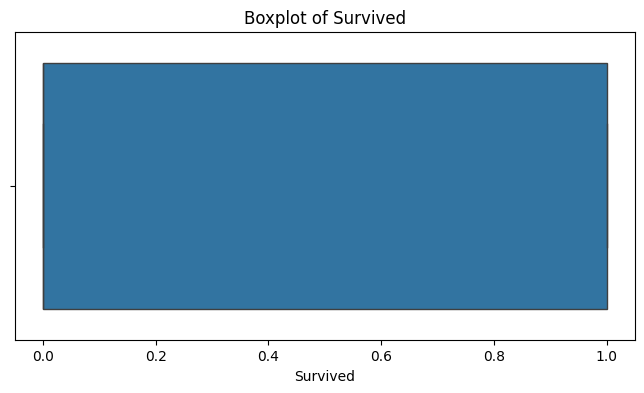

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


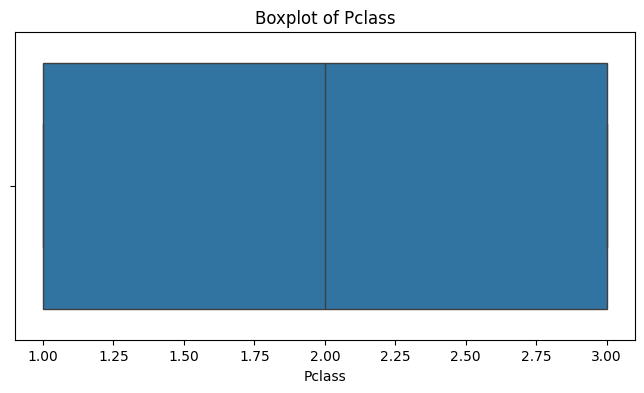

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


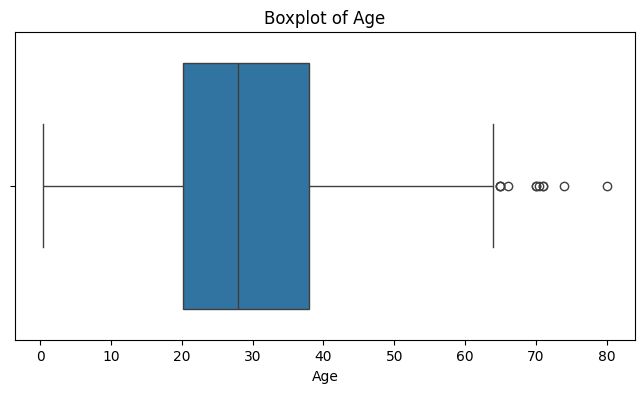

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


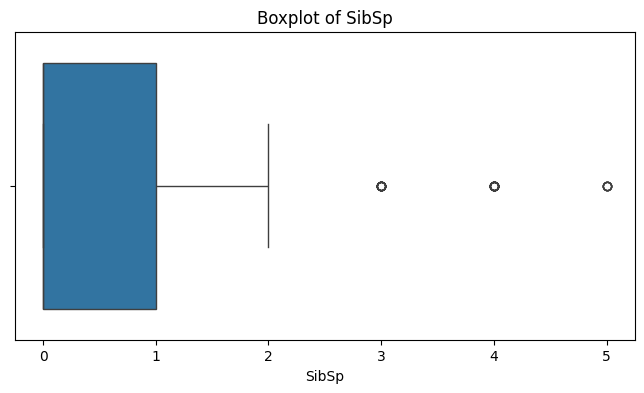

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


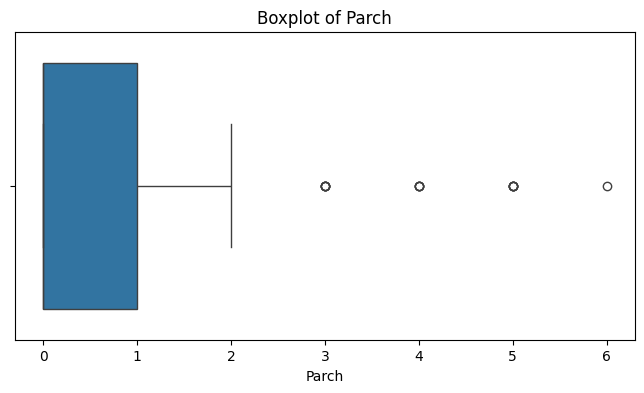

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


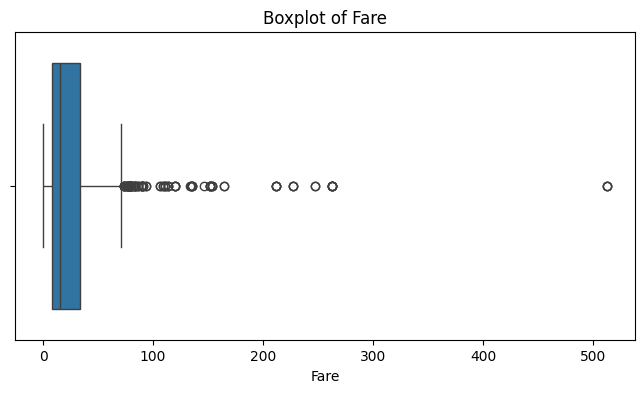

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize each numeric column with a boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16684\181175731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_outlier'] = outlier_rows


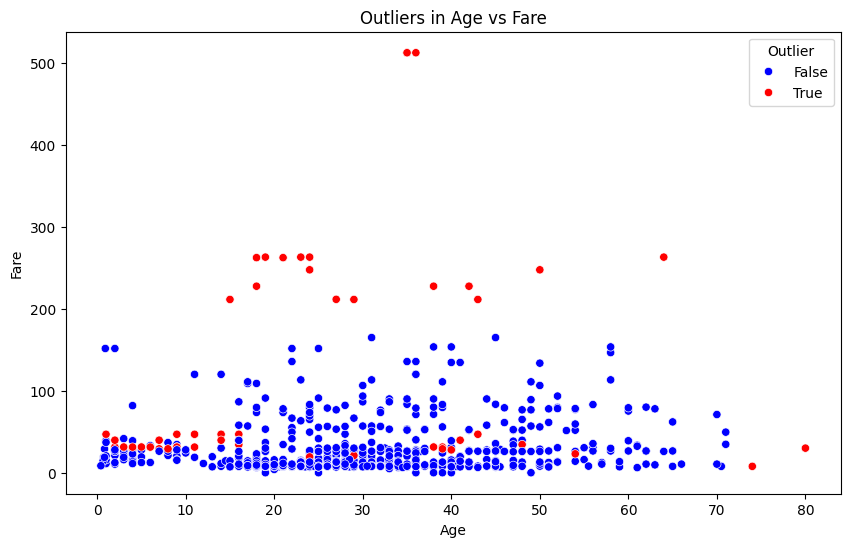

In [38]:
# Create a column to mark outliers
df['is_outlier'] = outlier_rows

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='is_outlier', palette={True: 'red', False: 'blue'})
plt.title("Outliers in Age vs Fare")
plt.legend(title="Outlier")
plt.show()


In [43]:
df_original=df.copy()

In [50]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median


All outliers has been removed.

In [54]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,is_outlier,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,15.7417,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,15.7417,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,0,382652,29.1250,True,False,True,False
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,False,False


In [55]:
df['is_outlier'] = df['is_outlier'].astype(int)
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)


In [56]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,is_outlier,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,15.7417,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,15.7417,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,0,382652,29.1250,1,0,1,0
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,0,0


Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns before scaling
features_to_scale = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Reconstruct scaled DataFrame
X = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
y = df['Survived']

In [59]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,is_outlier,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,15.7417,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,15.7417,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,0,382652,29.1250,1,0,1,0
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,0,0


Train and Test Split

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((571, 9), (143, 9), (571,), (143,))

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy


Build the ANN Model

In [64]:
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(units=8, activation='relu'))

# Output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))


Compile the Model

In [65]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Train the Model

In [67]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/50


29/29 [==============================] - 1s 10ms/step - loss: 0.7289 - accuracy: 0.4035 - val_loss: 0.6762 - val_accuracy: 0.5826
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5811 - val_loss: 0.6438 - val_accuracy: 0.6435
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6491 - val_loss: 0.6115 - val_accuracy: 0.7304
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.6974 - val_loss: 0.5793 - val_accuracy: 0.7565
Epoch 5/50
29/29 [==============================] - 0s 7ms/step - loss: 0.5647 - accuracy: 0.7346 - val_loss: 0.5461 - val_accuracy: 0.8087
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 0.5311 - accuracy: 0.7522 - val_loss: 0.5146 - val_accuracy: 0.8435
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.7785 - val_loss: 0.4919 - val_accuracy: 0.8609
Epoch 8/50
29/29 

In [68]:
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: "
          f"Train Loss = {history.history['loss'][i]:.4f}, "
          f"Val Loss = {history.history['val_loss'][i]:.4f}, "
          f"Train Acc = {history.history['accuracy'][i]:.4f}, "
          f"Val Acc = {history.history['val_accuracy'][i]:.4f}")


Epoch 1: Train Loss = 0.7289, Val Loss = 0.6762, Train Acc = 0.4035, Val Acc = 0.5826
Epoch 2: Train Loss = 0.6798, Val Loss = 0.6438, Train Acc = 0.5811, Val Acc = 0.6435
Epoch 3: Train Loss = 0.6409, Val Loss = 0.6115, Train Acc = 0.6491, Val Acc = 0.7304
Epoch 4: Train Loss = 0.6022, Val Loss = 0.5793, Train Acc = 0.6974, Val Acc = 0.7565
Epoch 5: Train Loss = 0.5647, Val Loss = 0.5461, Train Acc = 0.7346, Val Acc = 0.8087
Epoch 6: Train Loss = 0.5311, Val Loss = 0.5146, Train Acc = 0.7522, Val Acc = 0.8435
Epoch 7: Train Loss = 0.5012, Val Loss = 0.4919, Train Acc = 0.7785, Val Acc = 0.8609
Epoch 8: Train Loss = 0.4781, Val Loss = 0.4752, Train Acc = 0.7982, Val Acc = 0.8348
Epoch 9: Train Loss = 0.4611, Val Loss = 0.4639, Train Acc = 0.7961, Val Acc = 0.8261
Epoch 10: Train Loss = 0.4472, Val Loss = 0.4585, Train Acc = 0.7982, Val Acc = 0.8174
Epoch 11: Train Loss = 0.4378, Val Loss = 0.4547, Train Acc = 0.7917, Val Acc = 0.8174
Epoch 12: Train Loss = 0.4315, Val Loss = 0.4536, Tr

Evaluate the Model

In [69]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


5/5 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7832
Test Accuracy: 0.7832


In [70]:
import numpy as np

batch_size = 16
for i in range(0, len(X_test), batch_size):
    X_batch = X_test[i:i+batch_size]
    y_batch = y_test[i:i+batch_size]
    loss, acc = model.evaluate(X_batch, y_batch, verbose=0)
    print(f'Batch {i//batch_size + 1}: Loss = {loss:.4f}, Accuracy = {acc:.4f}')


Batch 1: Loss = 0.3351, Accuracy = 0.7500
Batch 2: Loss = 0.4780, Accuracy = 0.8125
Batch 3: Loss = 0.4410, Accuracy = 0.7500
Batch 4: Loss = 0.7753, Accuracy = 0.6875
Batch 5: Loss = 0.6329, Accuracy = 0.7500
Batch 6: Loss = 0.3585, Accuracy = 0.8125
Batch 7: Loss = 0.4734, Accuracy = 0.7500
Batch 8: Loss = 0.5338, Accuracy = 0.8750
Batch 9: Loss = 0.4000, Accuracy = 0.8667


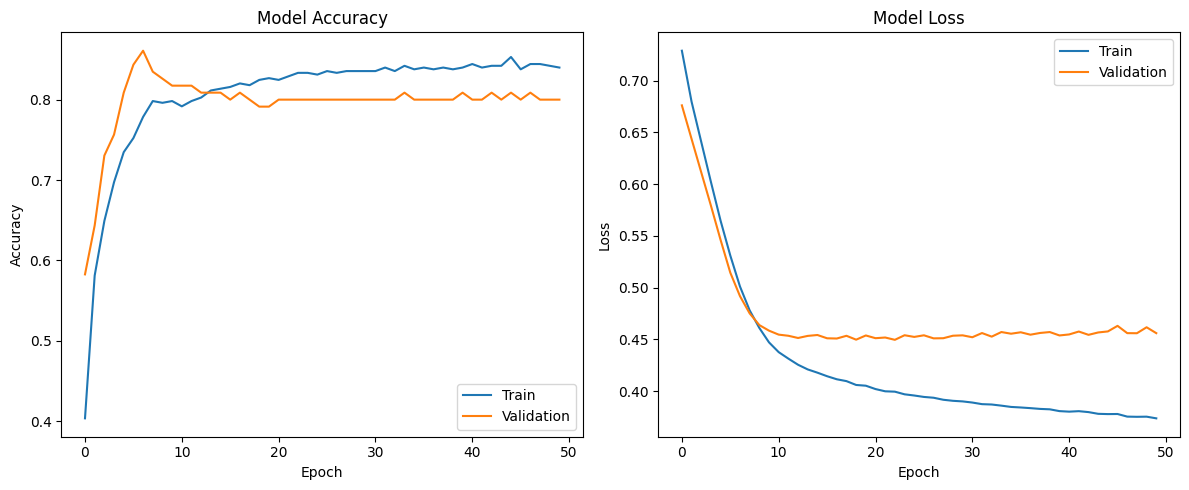

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Predict on Real Testing Data from Titanic

In [75]:
# Get the original feature order
feature_order = X.columns.tolist()

# Create a new passenger input with correct keys and dummy values
new_passenger = {
    'Pclass': 1,
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 80.0,
    'Sex_male': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1,
    'is_outlier': 0
}

# Create DataFrame with correct column order
new_passenger_df = pd.DataFrame([new_passenger])[feature_order]

# Scale using the trained scaler
new_passenger_scaled = scaler.transform(new_passenger_df)

# Predict
prediction = model.predict(new_passenger_scaled)
predicted_class = (prediction >= 0.5).astype(int)

# Print result
print(f"Predicted class: {predicted_class[0][0]} | Survival Probability: {prediction[0][0]:.4f}")


1/1 [==============================] - 0s 131ms/step
Predicted class: 1 | Survival Probability: 0.9557


Evaluating with Performace Matrix

In [76]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


5/5 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7832
Test Loss: 0.4926
Test Accuracy: 0.7832


In [77]:
import numpy as np

# Get class predictions (0 or 1)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")


5/5 [==============================] - 0s 2ms/step


In [78]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


Confusion Matrix:
[[74 13]
 [18 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        87
           1       0.75      0.68      0.71        56

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.77       143
weighted avg       0.78      0.78      0.78       143



5/5 [==============================] - 0s 2ms/step


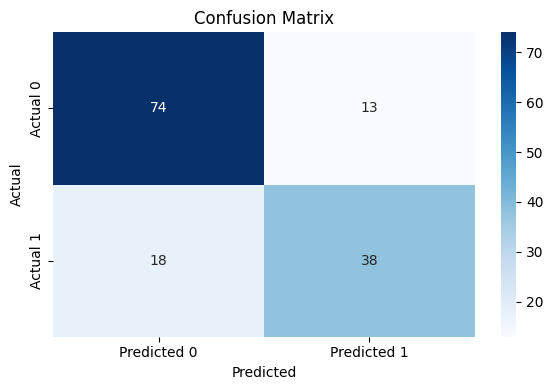

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it nicely
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


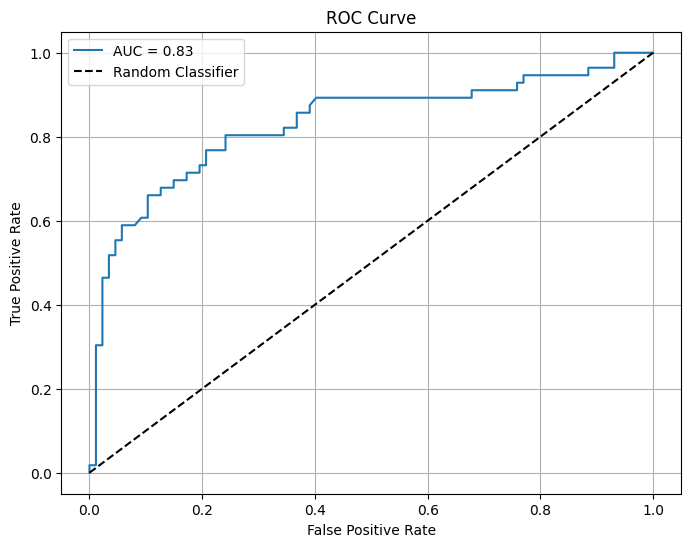

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
